## model building and evaluation

In [155]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score, auc, precision_recall_fscore_support, pairwise, f1_score, log_loss
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, Imputer
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression

In [156]:
import yellowbrick

In [246]:
def evaluate_model(model, x,y, cv=True):
    from sklearn.metrics import log_loss
    from sklearn.model_selection import cross_val_score

    if cv==True:
        cv_results= cross_val_score(model, x, y, scoring='roc_auc', cv=10)
        print("across 10 fold cv on trainingset, the model had \n", 
             "mean auroc: {:0.3f}".format(np.mean(cv_results)), "\n",
             "std auroc: {:0.3f}".format(np.std(cv_results))
             )

        base_cv_score=np.mean(cross_val_score(model, x, y, scoring='roc_auc', cv=10)) #groups= #whatever you need to stratify by (if you need to stratify),

    print("###metrics on provided dataset:###")
    ##basic trainingset model performance
    y_hat = model.predict(x)
    y_proba = model.predict_proba(x)[:,1]
    errors = abs(y_hat - y)
    mape = 100 * np.mean(errors / y) # mean absolute percentage error
    accuracy = 100 - mape 
    auc=roc_auc_score(y, y_proba)
    loss= log_loss(y, y_hat)

    print ('the AUC is: {:0.3f}'.format(auc))
    print ('the logloss is: {:0.3f}'.format(loss))
    print("confusion matrix:\n ", confusion_matrix(y, y_hat))
    print("classification report:\n ", classification_report(y,y_hat, digits=3))

    ez_roc(model, x, y, pos_label=1) #plotting roc curve
    #return()

In [174]:
def ez_roc(model, x, y, pos_label=1):
    import sklearn.metrics as metrics
    from sklearn.metrics import precision_score, roc_auc_score, f1_score, recall_score

    model_name=type(model).__name__

    y_pred = model.predict(x)
    y_proba = model.predict_proba(x)[:,1]
        
    fpr, tpr, thresholds = metrics.roc_curve(y, y_proba, pos_label=pos_label)
    roc_auc = metrics.auc(fpr, tpr)
    
    plt.title('ROC curve')
    ax1= plt.plot(fpr, tpr, 'b', label = '%s AUC = %0.3f' % (model_name, roc_auc), linewidth=2)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    return()

across 10 fold cv on trainingset, the model had 
 mean auroc: 0.834 
 std auroc: 0.034
###metrics on provided dataset:###
the AUC is: 0.871
the logloss is: 4.178
confusion matrix:
  [[2335   62]
 [ 276  121]]
classification report:
                precision    recall  f1-score   support

           0      0.894     0.974     0.933      2397
           1      0.661     0.305     0.417       397

   micro avg      0.879     0.879     0.879      2794
   macro avg      0.778     0.639     0.675      2794
weighted avg      0.861     0.879     0.859      2794



/Users/geickelb1/anaconda/envs/rpy-env/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/Users/geickelb1/anaconda/envs/rpy-env/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


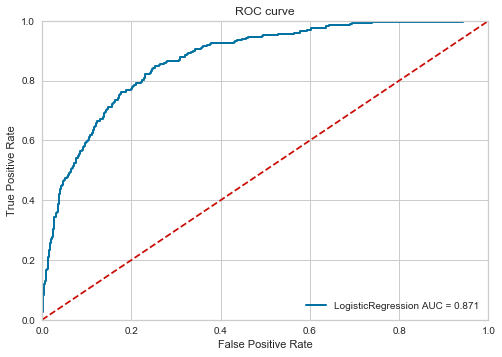

In [248]:
model= LogisticRegression(solver='liblinear')#, C = 0.01)
#model= LogisticRegression(C = 0.0001, penalty = 'l1', random_state = 42)
model.fit(x,y)
#evaluate_model(model,x,y)
evaluate_model(model,x,y,cv=True)

###metrics on provided dataset:###
the AUC is: 0.846
the logloss is: 4.671
confusion matrix:
  [[957  71]
 [ 91  79]]
classification report:
                precision    recall  f1-score   support

           0      0.913     0.931     0.922      1028
           1      0.527     0.465     0.494       170

   micro avg      0.865     0.865     0.865      1198
   macro avg      0.720     0.698     0.708      1198
weighted avg      0.858     0.865     0.861      1198



/Users/geickelb1/anaconda/envs/rpy-env/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/Users/geickelb1/anaconda/envs/rpy-env/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


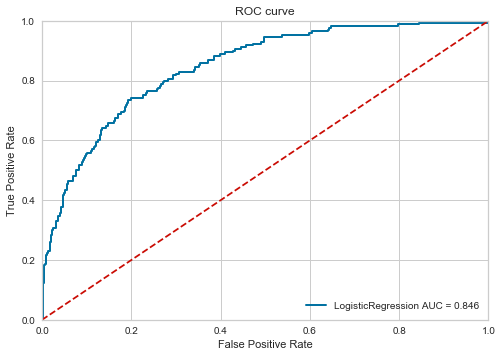

In [249]:
evaluate_model(model,x_test,y_test,cv=False)

In [229]:
sum(y_test)

170

across 10 fold cv on trainingset, the model had 
 mean auroc: 0.822 
 std auroc: 0.040
###metrics on provided dataset:###
the AUC is: 0.931
the logloss is: 4.104
confusion matrix:
  [[2397    0]
 [ 332   65]]
classification report:
                precision    recall  f1-score   support

           0      0.878     1.000     0.935      2397
           1      1.000     0.164     0.281       397

   micro avg      0.881     0.881     0.881      2794
   macro avg      0.939     0.582     0.608      2794
weighted avg      0.896     0.881     0.842      2794



/Users/geickelb1/anaconda/envs/rpy-env/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


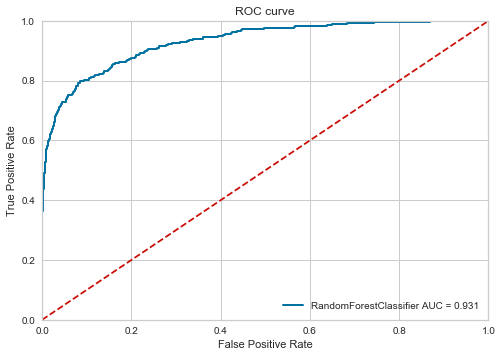

In [250]:
from sklearn.ensemble import RandomForestClassifier
# n_estimators = [10,15, 25, 50, 150, 250] #[int(x) for x in np.linspace(start = 10, stop = 1000, num = 5)]
# # Number of features to consider at every split
# max_features = [3,10,20,'auto']
# # Maximum number of levels in tree
# max_depth = [5,10, 25]#[int(x) for x in np.linspace(5, 110, num = 5)]
# #max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [2, 5, 10]
# # Method of selecting samples for training each tree. supposedly better with false when classes aren't perfectly ballanced
# bootstrap = [True, False] #[True, False] #[False] 

model= RandomForestClassifier(n_estimators=100,
                              min_samples_split=10,
                              random_state=12345,
                              bootstrap=False,
                              max_depth=5,
                              max_features='auto' )


model.fit(x,y)
evaluate_model(model,x,y, cv=True)

###metrics on provided dataset:###
the AUC is: 0.811
the logloss is: 4.757
confusion matrix:
  [[1026    2]
 [ 163    7]]
classification report:
                precision    recall  f1-score   support

           0      0.863     0.998     0.926      1028
           1      0.778     0.041     0.078       170

   micro avg      0.862     0.862     0.862      1198
   macro avg      0.820     0.520     0.502      1198
weighted avg      0.851     0.862     0.805      1198



/Users/geickelb1/anaconda/envs/rpy-env/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/Users/geickelb1/anaconda/envs/rpy-env/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


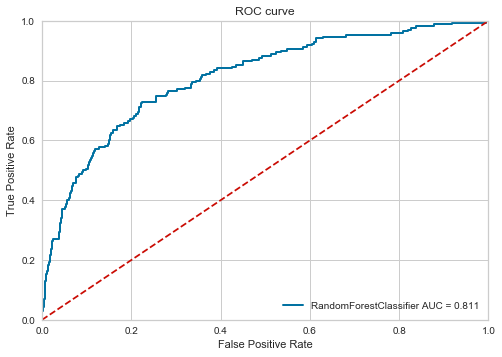

In [251]:
evaluate_model(model,x_test,y_test, cv=False)